<a href="https://colab.research.google.com/github/bvanitsthian/photocircle_nlp/blob/main/circles_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import string
import nltk
import re
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

In [ ]:
nltk.download('punkt')

In [ ]:
nltk.download('stopwords')

In [4]:
pip install wordcloud

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data = pd.read_csv('/content/drive/MyDrive/PhotoCircle/photocircle.csv')

In [7]:
data.head()

,circle_uuid,user_uuid,media_added_count_x,title,media_count,has_greek_words,real_estate_keywords,is_real_estate,solar_keywords,is_solar,...,is_location,display_name,email_domain,active_count_in_last_30_days,media_added_count_y,first_name,num_female,num_male,female_pct,is_student
0,00005962-836d-d551-c07b-5c2040500002,00000000-575c-c42a-d551-c018b1942652,96,Georgia Jean Williams,160.0,False,[],False,[],False,...,False,Darwin Williams,stthomas.edu,6.0,15.0,Darwin,83.0,24680.0,0.34,True
1,00005bfc-e475-d551-c026-3d658eab0002,4d4f4f68-feff-4490-bd45-ae90ba4acdbf,6,Tri Delta,12235.0,True,[],False,[],False,...,False,tara ghimenti,gmail.com,0.0,0.0,tara,0.0,0.0,50.00,False
2,55a82813-15c0-4faf-897d-d04803036af0,c31e9b29-bf13-4493-a017-54d531d51d7b,31,Vegas 2022,31.0,False,[],False,[],False,...,False,Brenda Yorks,privaterelay.appleid.com,0.0,0.0,Brenda,607096.0,2121.0,99.65,False
3,0000594a-f3f4-d551-c011-88e3b4ad0002,00000000-594a-f5ce-d551-c01188e3c8cb,8,WALK,587.0,False,[],False,[],False,...,False,Rebekah Farnham,gmail.com,0.0,0.0,Rebekah,73511.0,119.0,99.84,False
4,fc66e54c-8e12-4387-9579-be35b6f3d8ab,eebe45c6-66fb-4e86-9f39-c55f55d98c95,72,❤ Eric Hazen ❤,466.0,False,[],False,[],False,...,False,Cindy,live.com,0.0,0.0,Cindy,256399.0,770.0,99.70,False


In [8]:
data.dtypes

circle_uuid                      object
user_uuid                        object
media_added_count_x               int64
title                            object
media_count                     float64
has_greek_words                  object
real_estate_keywords             object
is_real_estate                   object
solar_keywords                   object
is_solar                         object
event_keywords                   object
is_event                         object
occupation_keywords              object
is_occupation                    object
animal_keywords                  object
is_animal                        object
destination_names                object
is_travel                        object
location_names                   object
is_location                      object
display_name                     object
email_domain                     object
active_count_in_last_30_days    float64
media_added_count_y             float64
first_name                       object


#**Preprocess 'title'**

In [41]:
data_pp = data[['circle_uuid', 'title']].drop_duplicates(subset='circle_uuid')

In [42]:
data_pp.shape

(2042587, 2)

In [43]:
data_pp[data_pp['title'].isna()] # 181068 NaN in 'title'

,circle_uuid,title
302,00005c88-7553-d551-c01e-574581620002,NaN
392,00005bb3-b960-d551-c04b-879321640002,NaN
403,00005be8-c07e-d551-c026-3d5044240002,NaN
411,00005597-3aba-9577-9c03-ef46b94b0002,NaN
537,c0b43ce2-cdfd-4362-b387-5544e47ffb1c,NaN
...,...,...
10578514,00005c3f-a7a6-d551-c026-3dc70d510002,NaN
10578516,5d7a3192-f536-4763-b38f-1ff45366276e,NaN
10578566,2951b8be-416e-4edd-8358-7dcac37d517e,NaN
10578668,00005b7d-96e7-d551-c021-fcc61b820002,NaN


In [44]:
data_pp = data_pp.dropna(subset=['title'])

In [45]:
data_pp

,circle_uuid,title
0,00005962-836d-d551-c07b-5c2040500002,Georgia Jean Williams
1,00005bfc-e475-d551-c026-3d658eab0002,Tri Delta
2,55a82813-15c0-4faf-897d-d04803036af0,Vegas 2022
3,0000594a-f3f4-d551-c011-88e3b4ad0002,WALK
4,fc66e54c-8e12-4387-9579-be35b6f3d8ab,❤ Eric Hazen ❤
...,...,...
7728706,00005f4c-3b8b-78bb-895c-0d5bc2d70002,Hh
7728765,000050fc-2893-1953-bb08-b420eeef0002,cité des sciences
7728779,ec8c80d7-7b4b-416f-9f85-6959ce5ae02c,Les Recettes De Tata Marcelle
7728780,00fa95b6-d352-4ed0-b308-b1d4abdf3e64,SR697242 Robert Christian


In [49]:
data_pp['title'] = data_pp['title'].str.lower()

In [50]:
tokenizer = RegexpTokenizer(r'\w+') #\w+ matches one or more word characters
data_pp['title'] = data_pp['title'].apply(tokenizer.tokenize)

In [51]:
stop_words = set(stopwords.words('english')) #create english stopwords
data_pp['title'] = data_pp['title'].apply(lambda text: [word for word in text if word.lower() not in stop_words]) #remove the stop words from each list of tokens in the column

In [52]:
data_pp['title'] = data_pp['title'].apply(lambda words: [word for word in words if word.isalpha()])

In [53]:
data_pp['title']

0                    [georgia, jean, williams]
1                                 [tri, delta]
2                                      [vegas]
3                                       [walk]
4                                [eric, hazen]
                          ...                 
7728706                                   [hh]
7728765                  [cité, des, sciences]
7728779    [les, recettes, de, tata, marcelle]
7728780                    [robert, christian]
7728815                               [family]
Name: title, Length: 1861519, dtype: object

In [54]:
stemmer = SnowballStemmer('english') #reduce words to their root 
data_pp['title'] = data_pp['title'].apply(lambda words: [stemmer.stem(word) for word in words])

In [55]:
data_pp['title']

0                  [georgia, jean, william]
1                              [tri, delta]
2                                    [vega]
3                                    [walk]
4                             [eric, hazen]
                         ...               
7728706                                [hh]
7728765                 [cité, des, scienc]
7728779    [les, recett, de, tata, marcell]
7728780                 [robert, christian]
7728815                            [famili]
Name: title, Length: 1861519, dtype: object

In [56]:
#save preprocessed data 
data_pp.to_csv('/content/drive/MyDrive/PhotoCircle/data_pp.csv', index=False)

#**Word Cloud**

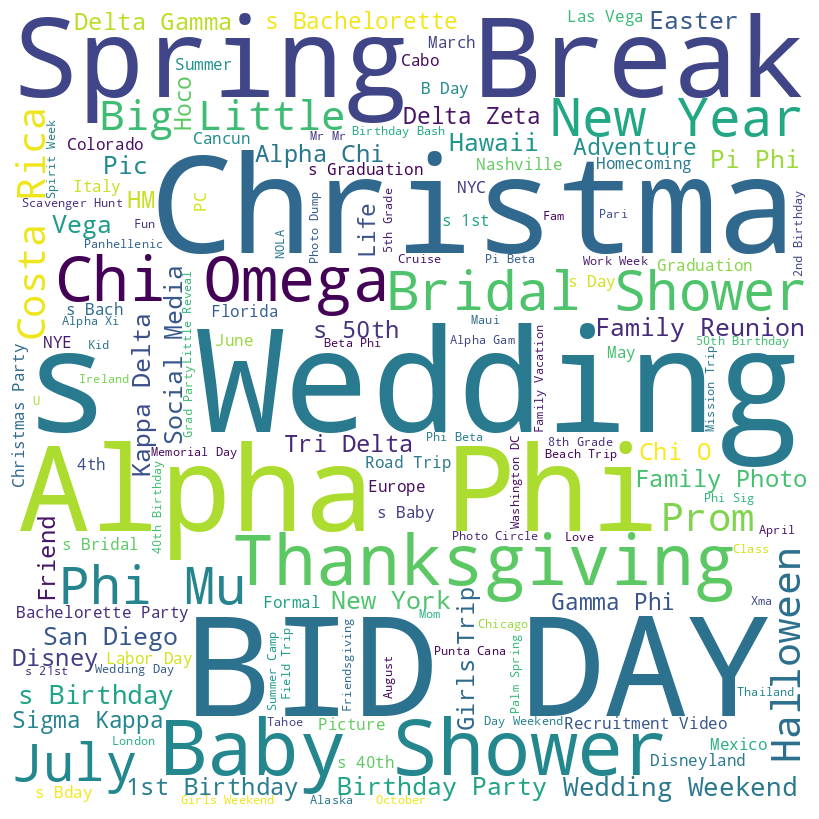

In [16]:
# Word Cloud before preprocessed data
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(data['title'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

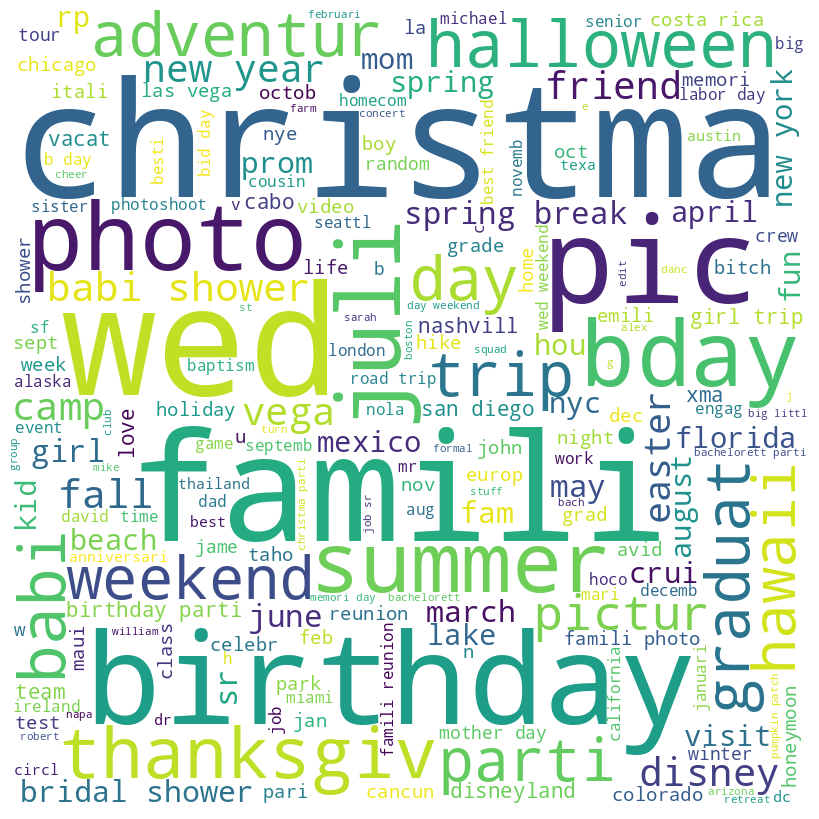

In [58]:
# Word Cloud AFTER preprocessed data
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(data_pp['title'].apply(lambda words: ' '.join(words)))
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#**Topic Modeling with Random Sampling in chunks of 100,000**

In [96]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [100]:
sampled_data = resample(data_pp, n_samples=100000, random_state=42)

cleaned_title = [' '.join(title) for title in sampled_data['title']]
vectorizer = CountVectorizer()
document_term_matrix = vectorizer.fit_transform(cleaned_title)

In [101]:
num_topics = 10  
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(document_term_matrix)

LatentDirichletAllocation(random_state=42)

In [103]:
feature_names = vectorizer.get_feature_names_out()
topic_keywords = []
for topic_idx, topic in enumerate(lda_model.components_):
    top_word_indices = topic.argsort()[:-6:-1]  # Get the indices of the top 5 keywords
    top_words = [feature_names[index] for index in top_word_indices]
    topic_keywords.append(', '.join(top_words))

topic_keywords

['friend, san, hous, sr, senior',
 'day, juli, summer, may, march',
 'babi, fall, shower, halloween, parti',
 'pic, new, year, cruis, fun',
 'wed, birthday, photo, day, hawaii',
 'christma, thanksgiv, pictur, camp, lake',
 'disney, adventur, big, cabo, littl',
 'trip, bday, girl, weekend, vega',
 'famili, graduat, spring, break, fam',
 'june, colorado, taho, engag, john']

In [104]:
topic_distribution = lda_model.transform(document_term_matrix)
topic_labels = ['Topic ' + str(i) for i in range(num_topics)]
topic_counts = pd.DataFrame(topic_distribution, columns=topic_labels)
topic_counts['Dominant Topic'] = topic_distribution.argmax(axis=1)
topic_counts['Dominant Topic'] = topic_counts['Dominant Topic'].apply(lambda x: topic_labels[x])

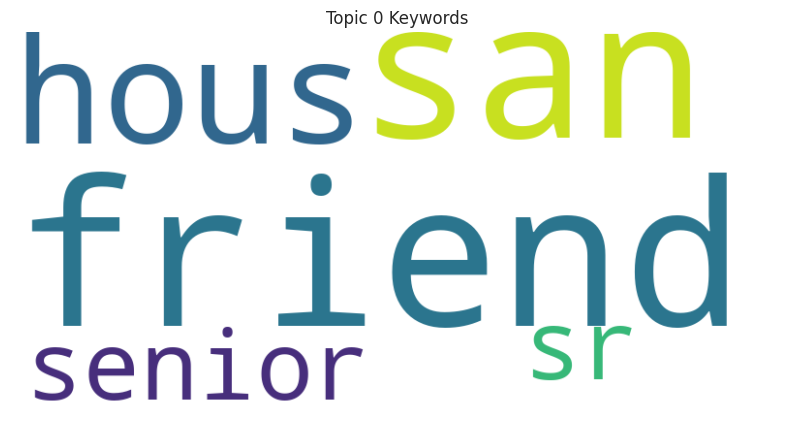

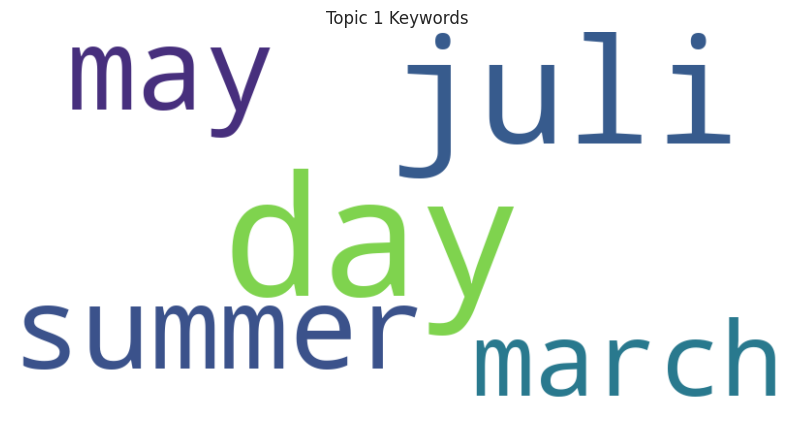

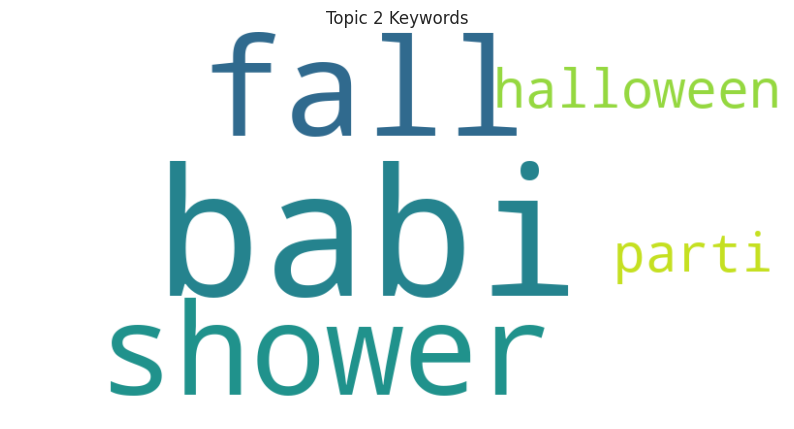

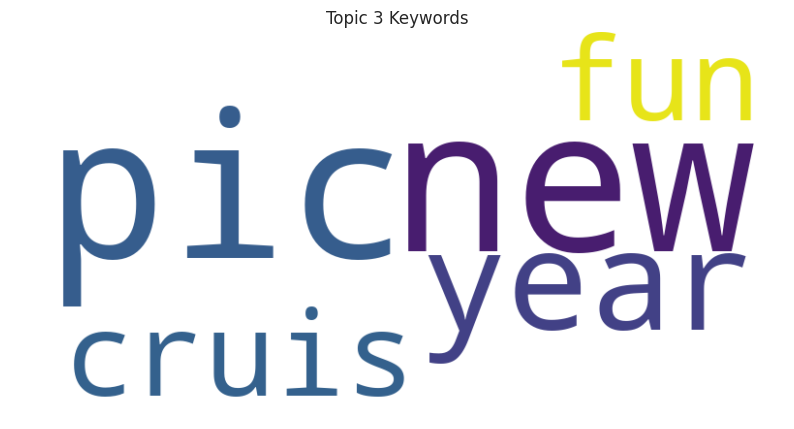

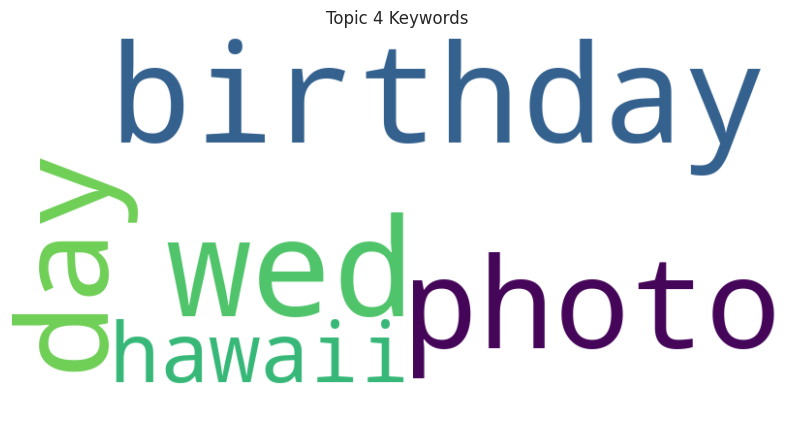

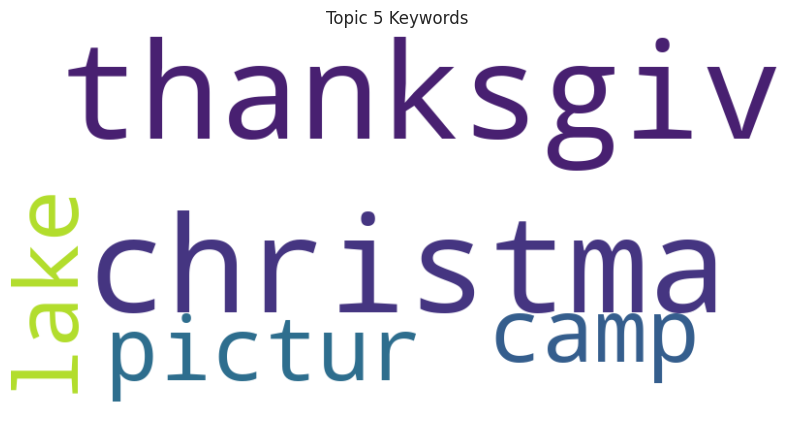

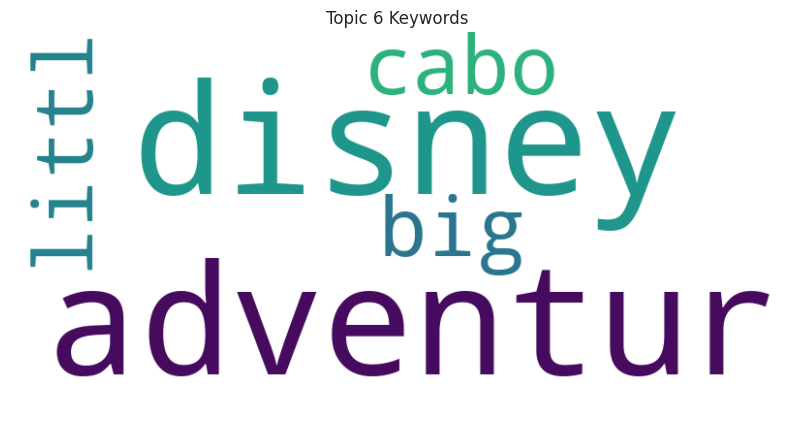

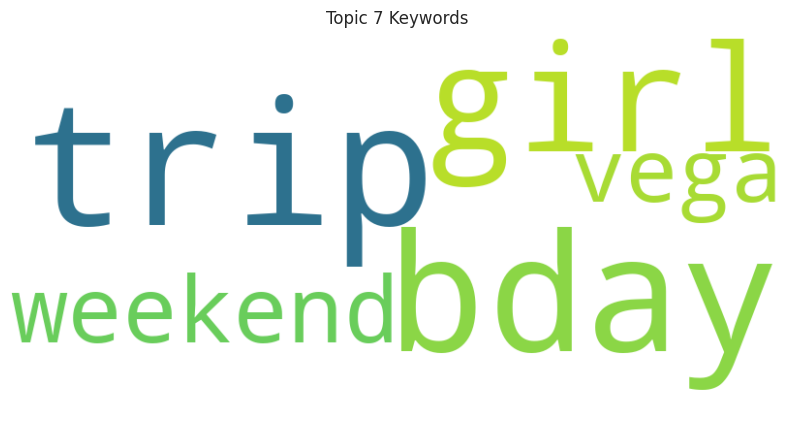

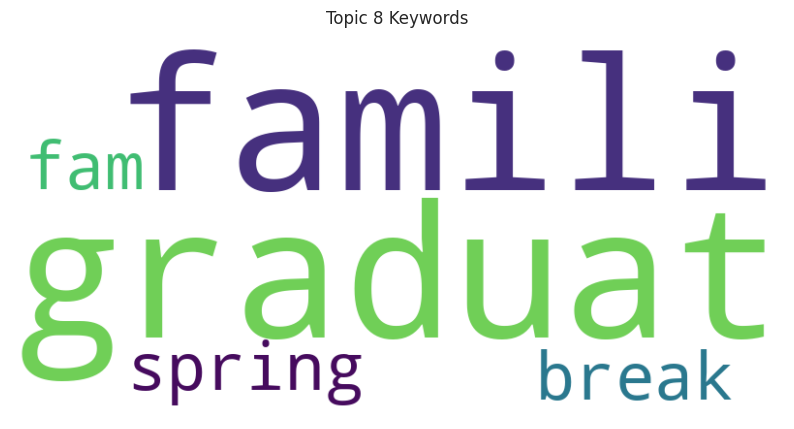

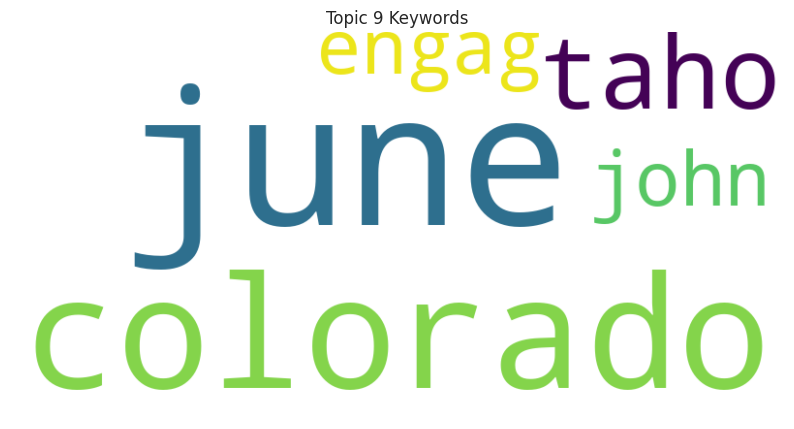

In [105]:
for topic_idx, topic_keywords in enumerate(topic_keywords):
    plt.figure(figsize=(10, 6))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(topic_keywords)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {topic_idx} Keywords')
    plt.axis('off')
    plt.show()

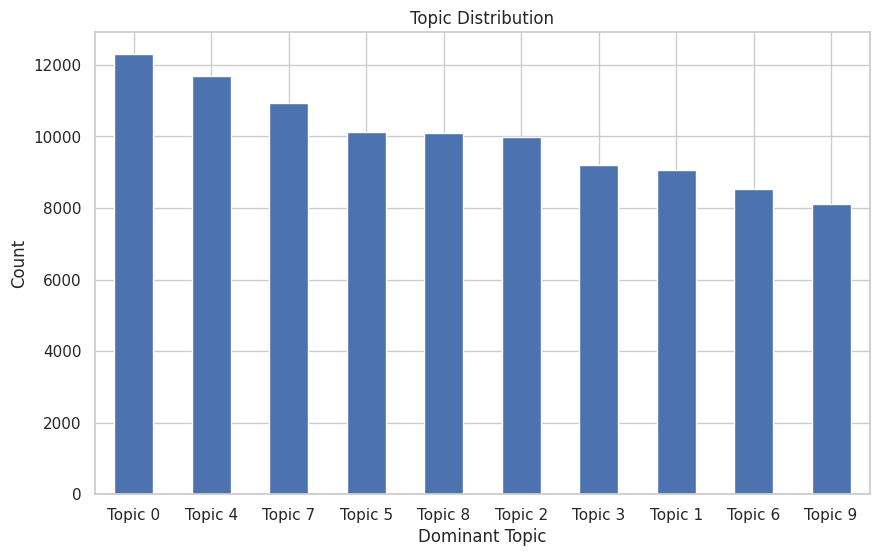

In [106]:
plt.figure(figsize=(10, 6))
topic_counts['Dominant Topic'].value_counts().plot(kind='bar')
plt.xlabel('Dominant Topic')
plt.ylabel('Count')
plt.title('Topic Distribution')
plt.xticks(rotation=0)
plt.show()

#**n gram**

In [107]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk import bigrams
from collections import Counter

In [119]:
sampled_data['title'] = sampled_data['title'].apply(lambda words: ' '.join(words))

In [120]:
sampled_data

,circle_uuid,title
139730,00005b8d-7b60-d551-c021-fca3a1d10002,mosaidyi las vega
1111986,d642e4d5-3000-41d7-bdd4-f42fb359c165,pmd
152311,c323a623-6753-40e6-a2b6-fce783ebde03,ami su rp
3940618,32573216-20b7-4ee8-a938-e45daa2e6c5f,dlp volleybal playoff
328600,00005bb8-c890-d551-c04b-87d171f30002,moodi pink cheer clinic game
...,...,...
3858902,a79800f1-721d-411b-8b36-bb9d4a96823a,christma light
2032573,56db9eab-bf33-4b0e-ad0e-d62695a61044,fall retreat
416767,00005a5c-3c6e-d551-c066-8369ce8b0002,vane
3856384,00005b0d-aef3-d551-c065-bd79e6be0002,beach


In [124]:
tokenized_titles = sampled_data['title'].str.split()

title_bigrams = list(bigrams([word for title in tokenized_titles for word in title]))

bigram_counts = Counter(title_bigrams)

most_common_bigrams = bigram_counts.most_common(10)

bigrams, frequencies = zip(*most_common_bigrams)

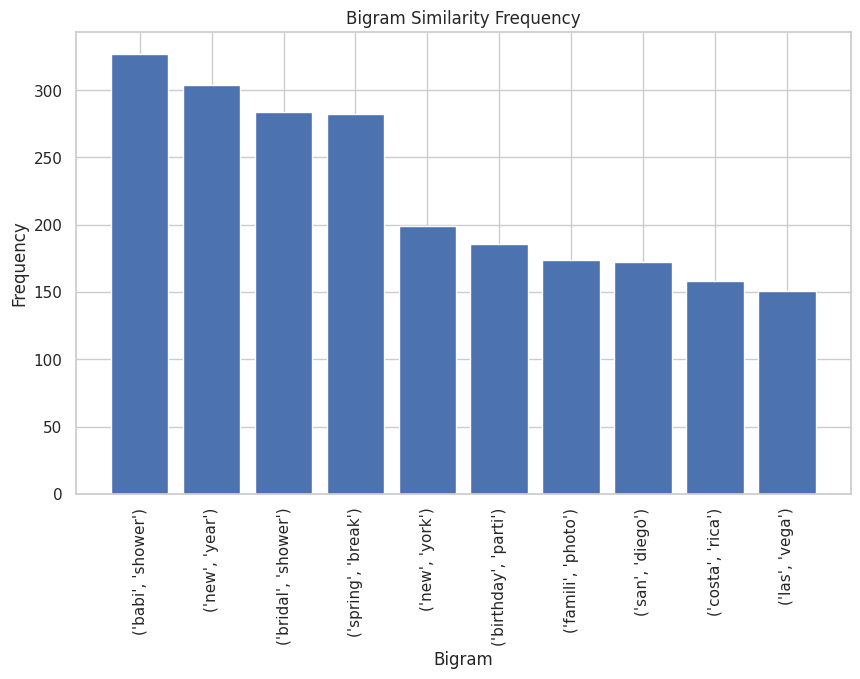

In [125]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(bigrams)), frequencies)
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.title('Bigram Similarity Frequency')
plt.xticks(range(len(bigrams)), bigrams, rotation=90)
plt.show()

#**Bigram with full dataset**

In [95]:
tokenized_titles = [title.split() for title in data_pp['title'] if isinstance(title, str)]

bigram_list = list(bigrams([word for title in tokenized_titles for word in title]))

bigram_counts = Counter(bigram_list)

most_common_bigrams = bigram_counts.most_common(10)

bigrams, frequencies = zip(*most_common_bigrams)

TypeError: ignored

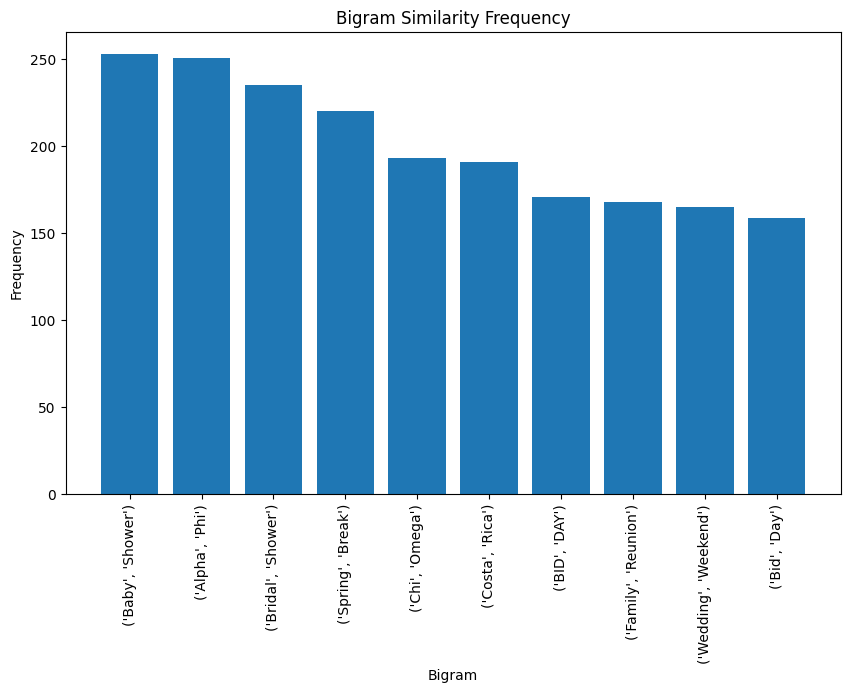

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(bigrams)), frequencies)
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.title('Bigram Similarity Frequency')
plt.xticks(range(len(bigrams)), bigrams, rotation=90)
plt.show()

In [91]:
import seaborn as sns

In [92]:
df = pd.DataFrame({'Bigram': bigrams, 'Frequency': frequencies})

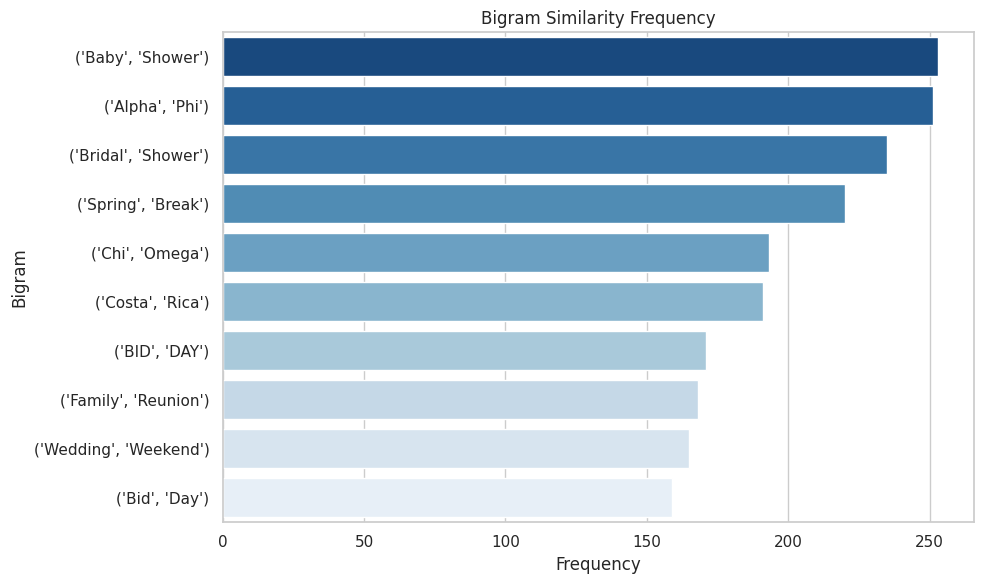

In [93]:
sns.set(style='whitegrid')

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Bigram', data=df, palette='Blues_r')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.title('Bigram Similarity Frequency')
plt.tight_layout()
plt.show()

#**Word Co-occurrence**

In [114]:
import networkx as nx

In [119]:
co_occurrence_matrix = pd.DataFrame(0, index=vectorizer.get_feature_names_out(), columns=vectorizer.get_feature_names_out())

#**Make Interactive bigram for every 100,000 random samples**

#**This crashed**

In [ ]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

In [ ]:
cleaned_album_names = data['title'].apply(lambda x: x.lower())  

tokenized_album_names = cleaned_album_names.str.split()

model = Word2Vec(sentences=tokenized_album_names, vector_size=100, window=5, min_count=5, workers=4)

word_embeddings = model.wv

tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne = tsne.fit_transform(word_embeddings[word_embeddings.key_to_index])

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], alpha=0.5)
for i, word in enumerate(word_embeddings.key_to_index):
    plt.annotate(word, (embeddings_tsne[i, 0], embeddings_tsne[i, 1]))
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Word Embeddings Visualization')
plt.show()